In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from tqdm import tqdm

running_dir = r"c:\\Users\\micha\\Downloads\\Bens_Tetris_Regression"
## Dataloading
df = pd.read_csv (os.path.join(running_dir, "sprint_data.csv"))
df.columns = df.columns.str.lower()
df["normalized_pps"] = df["approxpps"].map (lambda x: 1 / (1 + np.exp(-x)))

df.head()

,timescorekaiyon,replay,played3,datestart,approxpps,dayssincestart,ln(days),ln(pps),normalized_pps
0,247.775,11409815,2020-02-10 4:13:34,2020-02-09,0.403592,1.176088,0.162194,-0.907351,0.599550
1,210.933,11410692,2020-02-11 4:13:34,2020-02-09,0.474084,2.176088,0.777529,-0.746370,0.616350
2,188.721,11410748,2020-02-12 4:13:34,2020-02-09,0.529883,3.176088,1.155650,-0.635100,0.629456
3,163.329,11446804,2020-02-11 4:16:08,2020-02-09,0.612261,2.177870,0.778348,-0.490596,0.648456
4,157.704,11447133,2020-02-11 4:26:21,2020-02-09,0.634099,2.184965,0.781600,-0.455550,0.653418


In [2]:
from scipy.optimize import curve_fit

# linear function
# def func (x, a, b, c):
#     return a*x + b + c

# Asymptotic function 
def func (x, a, b, c):
    return np.e**(a*x + b) + c    

# natural logarithm function
# def func (x, a, b, c):
#     return a * np.log(x) + b

xVar = "dayssincestart"
yVar = "timescorekaiyon"

xData = df[xVar]
yData = df[yVar]

popt, pcov = curve_fit(
    func, 
    xData, 
    yData,
    bounds=(-1000, [1000.,  1000.,  1000. ]),
    check_finite=True,
    maxfev=10000,
    )

array([-6.65361311e-03,  4.64390028e+00,  3.40215412e+01])

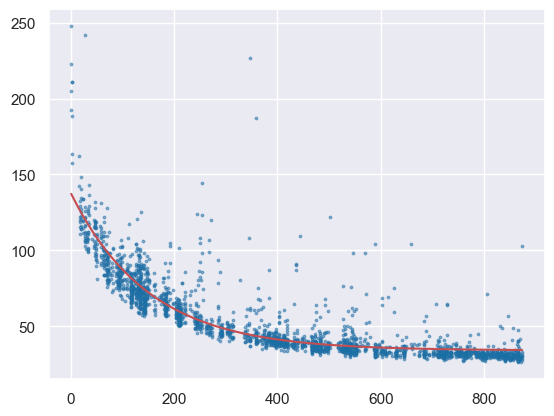

In [26]:
sns.set_theme()
# sns.scatterplot (df, x=xVar, y=yVar, s=5)
plt.scatter (xData, yData, s=3, label='data', edgecolors="#146fa3", linewidths=1, alpha=0.5)

xModel = np.linspace (min(xData), max(xData), 250)
yModel = func (xModel, *popt)
plt.plot(
    xModel, yModel, 'r-',
    label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# plt.ylim(0, 200)
popt

In [46]:
# Metrics
AE = (func(xData, *popt)) - yData
SE = np.square(AE) 
MSE = np.mean(SE) 
RMSE = np.sqrt(MSE) 
Rsquared = 1.0 - (np.var(AE) / np.var(yData))
print(f"{RMSE=}")
print(f"{Rsquared=}")

RMSE=11.813217696660045
Rsquared=0.7989868903501287
